In [1]:
import pandas as pd
import numpy as np
import datastats as dt
import structdata as st
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Data Description of variables

In [2]:
# data_def = pd.read_csv('Xente/Xente_Variable_Definitions.csv')
# data_def

In [3]:
#Read in data set
train_data = pd.read_csv('Xente/training.csv')
test_data = pd.read_csv('Xente/test.csv')
weather_data = pd.read_excel('Xente/WeatherNairobi2016.xls')
sample_submission = pd.read_csv('Xente/sample_submission_xente.csv')


In [5]:
# dt.get_unique_counts(train_data)

,Feature,Unique Count
0,TransactionId,95662
1,BatchId,94809
2,AccountId,3633
3,SubscriptionId,3627
4,CustomerId,3742
5,CurrencyCode,1
6,ProviderId,6
7,ProductId,23
8,ProductCategory,9
9,ChannelId,4


In [22]:
def bar_cat_2_cat_target(data=None, cat_features=None, target=None, fig_size=(12,6), save_fig=False):
    '''
    Makes a side by side bar plot of all categorical featureures against the target classes.
    
 
    Parameters
    ------------

    data : Pandas dataframe.
            The data we are working with.
    cat_features: Scalar, array, or list. 
               The categorical features in the dataset, if not provided, 
               we try to infer the categorical columns from the dataframe.
    fig_size: tuple
              The size of the figure object
    save_fig: boolean
            If True, saves the current plot to the current working directory
    '''


    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    if cat_features is None:
        cat_features = dt.get_cat_feats(data)


    #remove target from cat_features
    try:
        cat_features.remove(target)
    except:
        pass
    
    if len(data[target].unique()) > 7:
        raise AttributeError("Target categories must be less than seven")

    #Create a dummy column to hold count of values
    data['dummy_count'] = np.ones(shape = data.shape[0])
    #Loop over each categorical featureure and plot the acceptance rate for each category.
    for feature in cat_features:
        
        if len(data[feature].unique()) > 10 :
            print("{} feature has too many categories and will not be ploted".format(feature))
            
        else:     
            counts = data[['dummy_count', target, feature]].groupby([target, feature], as_index = False).count()
            #get the categories
            cats = list(data[target].unique())

            if len(cats) > 6:
                raise ValueError("Target column: '{}' must contain less than six unique classes".format(target))

            #create new figure
            _ = plt.figure(figsize = fig_size)

            for i, cat in enumerate(cats): 
                plt.subplot(1, len(cats), i+1)
                #Get the counts each category in target     
                temp = counts[counts[target] == cat][[feature, 'dummy_count']] 
                sns.barplot(x=feature, y='dummy_count', data=temp)
                plt.xticks(rotation=90)
                plt.title('Counts for {} \n class {}'.format(feature, cat))
                plt.ylabel('count')
                plt.tight_layout(2)

                if save_fig:
                    plt.savefig('fig_cat_2_cat_target_{}'.format(feature))


    #Drop the dummy_count column from data
    data.drop(['dummy_count'], axis=1, inplace = True)

TransactionId feature has too many categories and will not be ploted
BatchId feature has too many categories and will not be ploted
AccountId feature has too many categories and will not be ploted
SubscriptionId feature has too many categories and will not be ploted
CustomerId feature has too many categories and will not be ploted
ProductId feature has too many categories and will not be ploted
TransactionStartTime feature has too many categories and will not be ploted


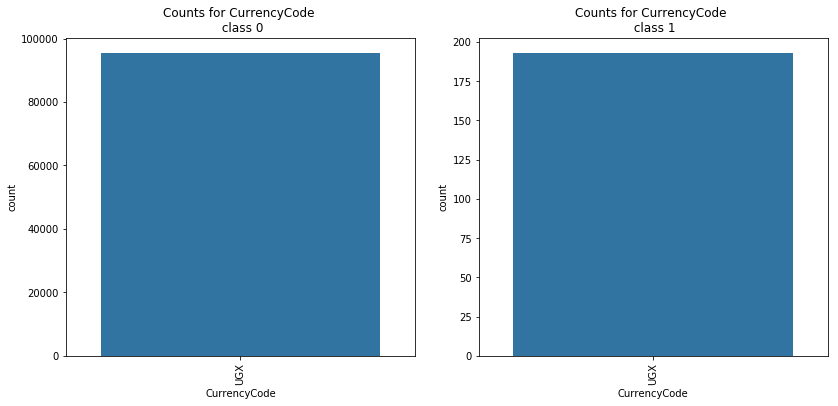

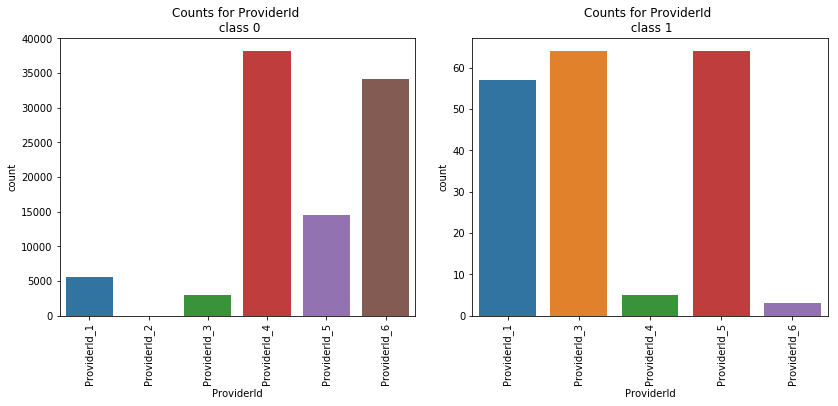

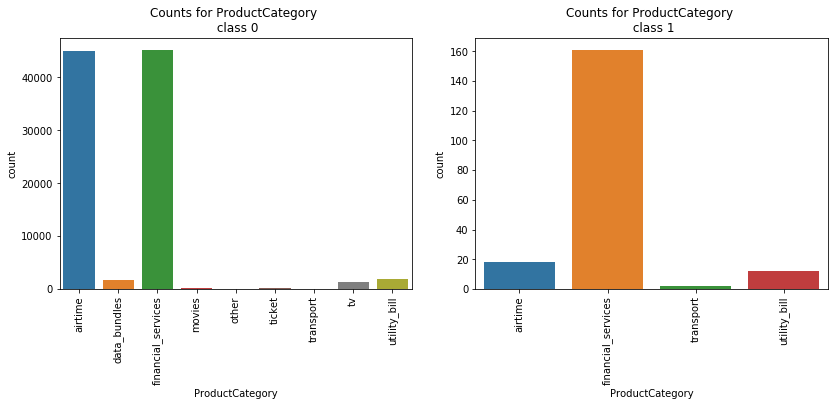

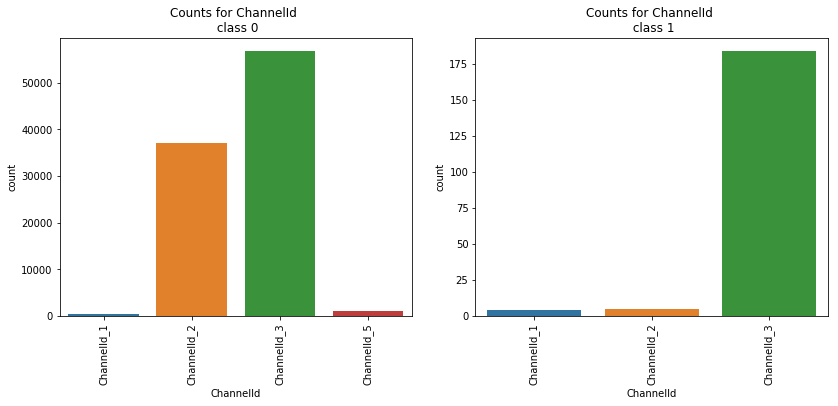

In [23]:
bar_cat_2_cat_target(train_data,target='FraudResult')